# Business Understanding

For this project, I was interestested in using Stack Overflow data from 2017 to better understand:  **How to get a higher salary?**  
So I decided to explore from the following three parts: 
- What kind of software developer should I be?
- Which program language and should I learn?    
- Should I get a higher degree？

# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
schema = pd.read_csv('survey_results_schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [4]:
def get_description(column_name):
    '''
    Get column name description of the sruvey result public data frame
    
    Parameters:
    column_name: Colomn name in df
    
    Return:
    description of the column name
    '''
    return schema[schema.Column == column_name]['Question'].values[0]

In [5]:
get_description('Salary')

'What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?'

In [6]:
def bar(df, column_name, title):
    '''
    Shows a bar chart with a title
    
    Parameters:
    df: dataframe
    column_name: the column which we want to show
    title: the title of the chart 
    '''
    status_vals = df[column_name].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

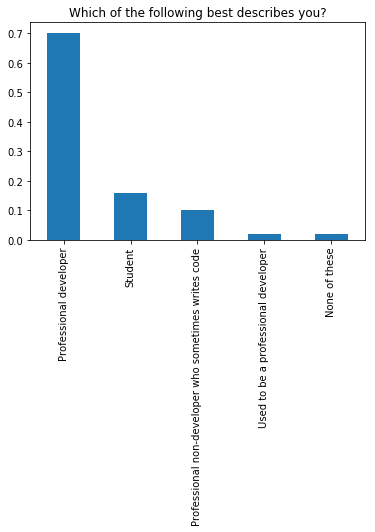

In [7]:
bar(df, 'Professional', get_description('Professional'))

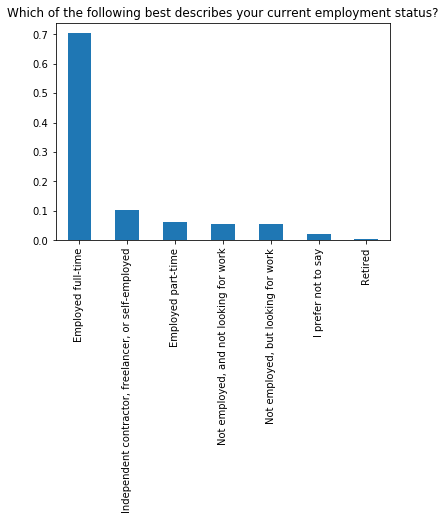

In [8]:
bar(df, 'EmploymentStatus', get_description('EmploymentStatus'))

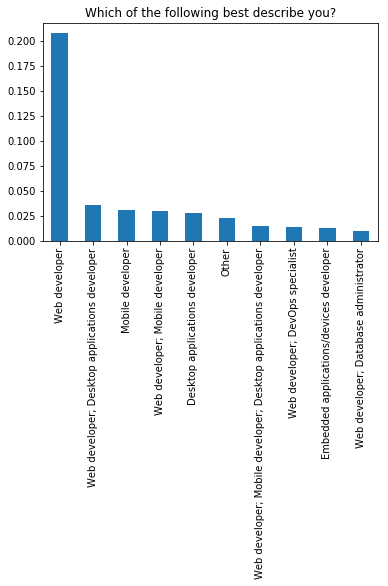

In [9]:
bar(df, 'DeveloperType', get_description('DeveloperType'))

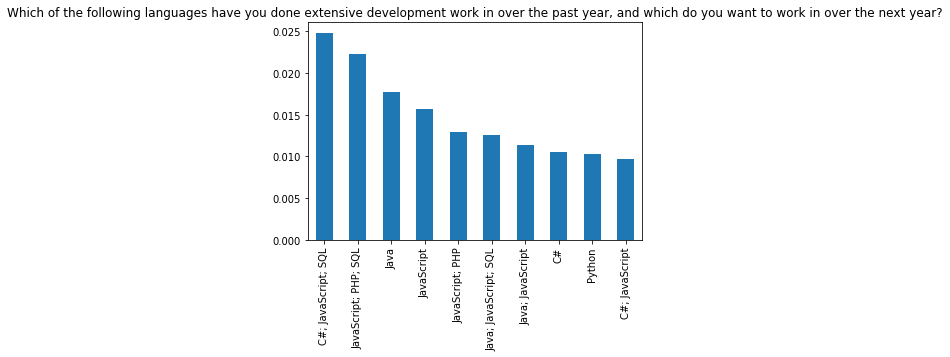

In [10]:
bar(df, 'HaveWorkedLanguage', get_description('HaveWorkedLanguage'))

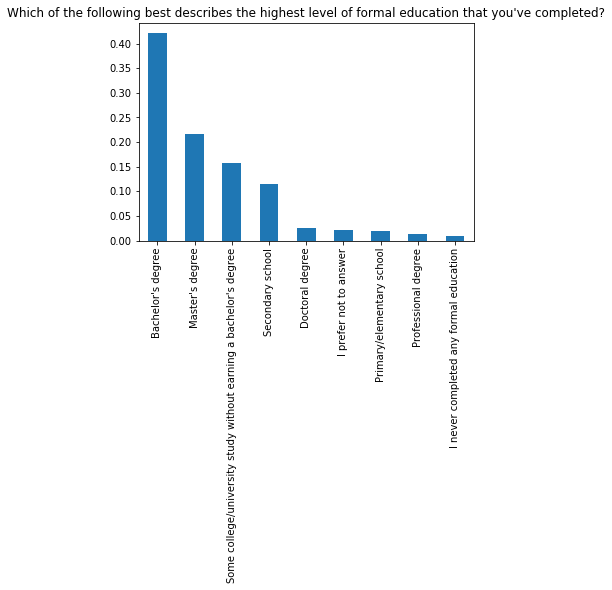

In [11]:
bar(df, 'FormalEducation', get_description('FormalEducation'))

# Prepare Data

Here I only consider professional developers working full time.  
So I decide to use thses columns:  
- Professional
- EmploymentStatus
- DeveloperType
- HaveWorkedLanguage
- FormalEducation
- Salary

In [12]:
def clean_data(df, columns):
    '''
    INPUT
    df - pandas dataframe 
    columns - a list of column name of pandas dataframe you want to use
    
    OUTPUT
    cleaned_df - pandas dataframe with specified columns
    '''
    # Select all the rows with specified columns
    df = df[columns]
    
    # Drop all the rows with no salaries
    df = df.dropna(subset=['Salary'])
    
    # Select all professional developers working full time
    df = df[(df['Professional'] == 'Professional developer') & (df['EmploymentStatus'] == 'Employed full-time')]
    
    return df

In [13]:
columns = ['Professional', 'EmploymentStatus', 'DeveloperType', 'HaveWorkedLanguage', 'FormalEducation', 'Salary']
cleaned_df = clean_data(df=df, columns=columns)
print(cleaned_df.shape)
print(df.shape)

(12444, 6)
(51392, 154)


# Data exploration

### Part I: What kind of software developer should I be?

In [14]:
dt_df = cleaned_df.groupby(['DeveloperType'])['Salary'].mean()
dt_df.head()

DeveloperType
Data scientist                                                        65907.610042
Data scientist; Database administrator                                61496.087361
Data scientist; Database administrator; Other                         64587.973274
Data scientist; Database administrator; Quality assurance engineer    64102.564103
Data scientist; Database administrator; Systems administrator         71666.666667
Name: Salary, dtype: float64

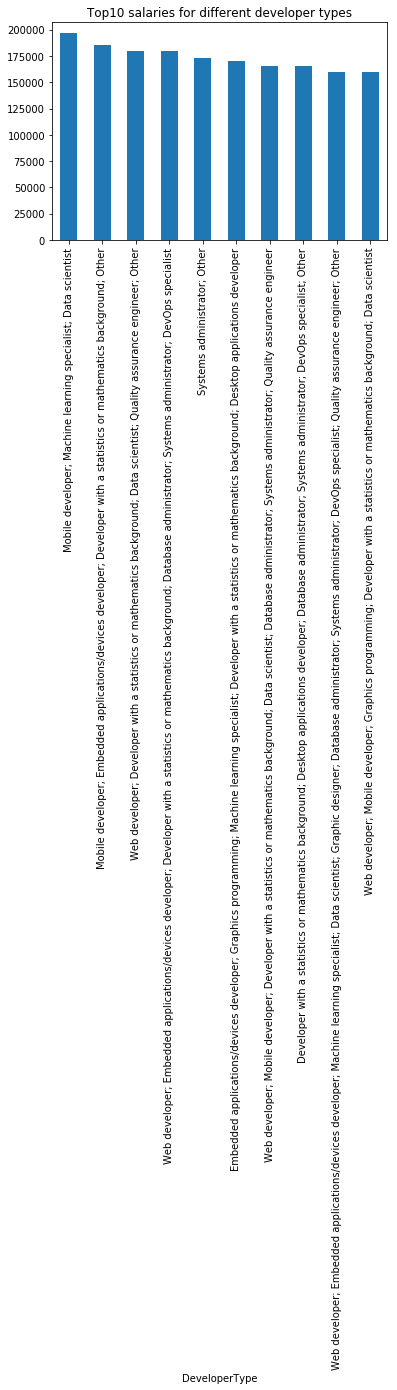

In [15]:
dt_df.sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top10 salaries for different developer types');

### Part II: Which program language and should I learn?

In [16]:
language_df = cleaned_df.groupby(['HaveWorkedLanguage'])['Salary'].mean()
language_df.head()

HaveWorkedLanguage
Assembly                                                          101809.954751
Assembly; C                                                        25038.733990
Assembly; C#                                                       52580.645161
Assembly; C#; CoffeeScript; JavaScript; SQL; Swift; TypeScript     59139.784946
Assembly; C#; Common Lisp; JavaScript; PHP; Python; SQL; VBA       56818.181818
Name: Salary, dtype: float64

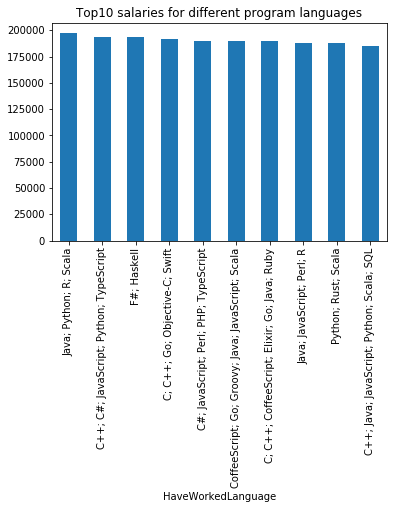

In [17]:
language_df.sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top10 salaries for different program languages');

### Part III: Should I get a higher degree？

In [18]:
fe_df = cleaned_df.groupby(['FormalEducation'])['Salary'].mean()
fe_df.head()

FormalEducation
Bachelor's degree                         57830.807928
Doctoral degree                           78972.120471
I never completed any formal education    44430.660621
I prefer not to answer                    39855.805769
Master's degree                           58497.559227
Name: Salary, dtype: float64

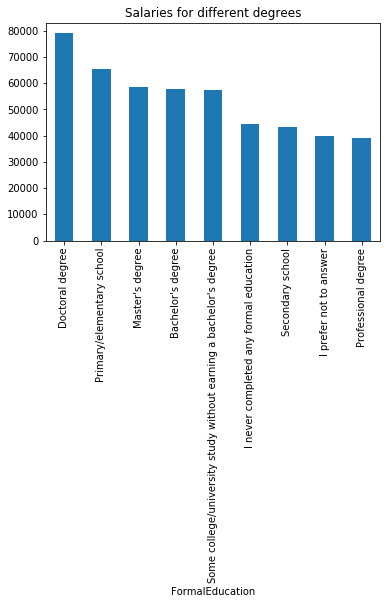

In [19]:
fe_df1 = pd.DataFrame(fe_df).reset_index()
fe_df1.groupby('FormalEducation')['Salary'].mean().sort_values(ascending=False).plot.bar()
plt.title('Salaries for different degrees');

# Conclusion

- Become a mobile developer or data scientist, machine learning specialist can get higher salary. This result is in line with the current trend. In the era of mobile Internet, artificial intelligence and big data, these three jobs have a much higher salary than traditional development.
- If you want to be a mobile developer, you can chose to learn Java to become Android developer. Or you can learn Python, R or Scala to be a data scientist or machine learning specialist.
- If you want be a data scientist or machine learning specialist. You should get higher degree, the higher the salary. 